<a href="https://colab.research.google.com/github/wsonguga/SensorAI/blob/main/tutorials/tutorial_dsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [ ]:
# This code clones the SensorAI github repository to colab
  # Note: rerunning this code segment will give an error if the repository currently exists in your colab
!git clone https://github.com/wsonguga/SensorAI.git

# Once this code is executed, click the file icon to the left to verify all files have been cloned

 # Option 1: Setup Tutorial in Colab

If using Google Colab, run the following code prior to running any tutorial code.  If running code locally, ignore this section

In [ ]:
# Set the root path to github repository
import os

root_path = "/content/SensorAI"

repo_root = os.path.join("/content/SensorAI")

!ls

os.chdir('SensorAI')

%ls             # display directory content

# Option 2: Setup Tutorial in Local

If setting up in local, run the following code prior to running any tutorial code.

In [1]:
# Set the root path to github repository
import os

root_path = os.getcwd()

repo_root = os.path.join(root_path)

# !ls

os.chdir(repo_root)
os.chdir('../')



# INSTALL REQUIRED PACKAGES

In [ ]:
# INSTALL REQUIRED PACKAGES

!chmod +x install.sh  # Make the script executable
!./install.sh

# Running the code
If you have already setup the environment, please start from here. Path setting only needs to run once. If you have run it in the installation part, please skip this block.

In [1]:
# Set the root path to github repository
import os

root_path = os.getcwd()
print(root_path)
repo_root = os.path.join(root_path)

# !ls

os.chdir(repo_root)



/Users/zz42588/SensorAI-main/tutorials


# Raw BSG Signal
Here is a figure of the signal collected by our self-developed device, called BedDot. This signal, referred to as the BSG signal, captures vibrations on the human body surface. These vibrations are generated by heartbeat, respiration, and muscle activity.

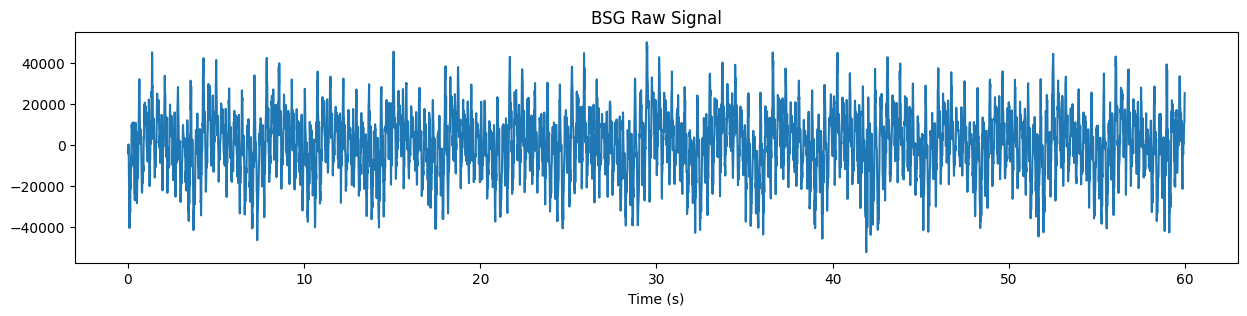

In [11]:
import numpy as np
import matplotlib.pyplot as plt

bsg = np.load('BSG_examples.npy')
t = np.arange(len(bsg)) / 100

plt.figure(figsize=(15,3))
plt.plot(t, bsg)
plt.title('BSG Raw Signal')
plt.xlabel('Time (s)')
plt.plot()
plt.show()


# Filtering
A straightforward task is to extract heart rate and respiration rate from a segment of the signal. To achieve this, we first separate the components related to respiration and heartbeat from the raw signal. Here, we apply two band-pass filters with different frequency ranges to isolate these components.

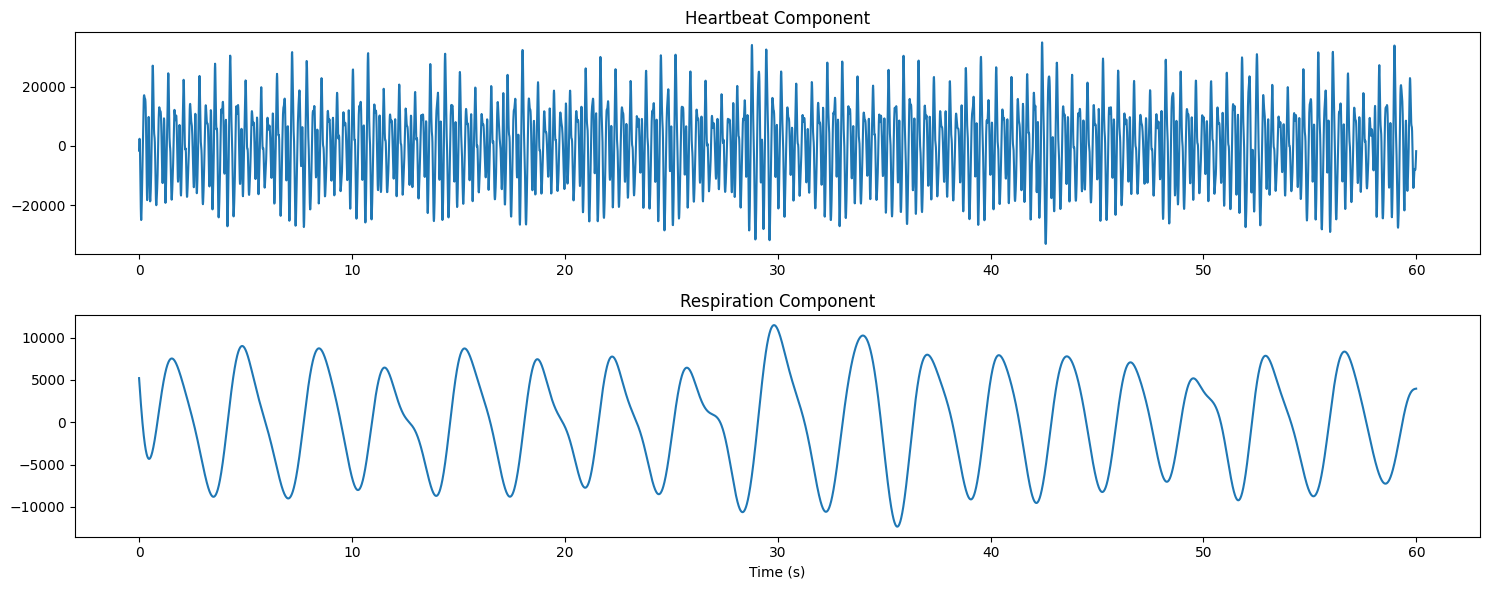

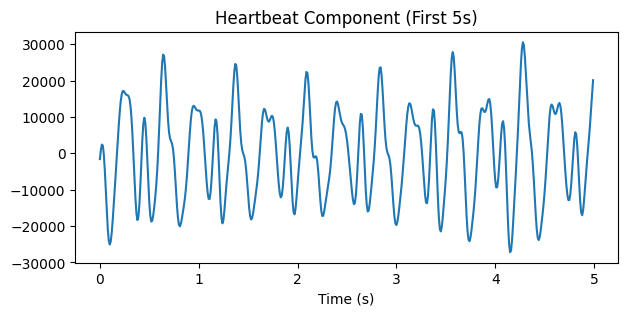

In [30]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, lowcut, highcut, fs, order=3):
    """
    :param signal: Input signal
    :param lowcut: The lower cut off frequency (Hz)
    :param highcut: The higher cut off frequency (Hz)
    :param fs: Sampling rate (Hz)
    :param order: The step order of the filter
    :return: The filtered signal
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, signal)
    return y

def lowpass_filter(signal, cutoff, fs, order=3):
    """
    :param signal: Input signal
    :param cutoff: The cut off frequency (Hz)
    :param fs: Sampling rate (Hz)
    :param order: The step order of the filter
    :return: The filtered signal
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low')
    y = filtfilt(b, a, signal)
    return y

heart_beat = bandpass_filter(bsg, 2, 10, 100, 3)
respiration = lowpass_filter(bsg, 0.6, 100, 3)

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(t, heart_beat)
plt.title('Heartbeat Component')

plt.subplot(2,1,2)
plt.plot(t, respiration)
plt.title('Respiration Component')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(7,3))
plt.plot(t[:500], heart_beat[:500])
plt.title('Heartbeat Component (First 5s)')
plt.xlabel('Time (s)')
plt.show()
plt.close()

# Peaks Locating
From these two signals, we can clearly observe the heartbeat and respiration. By identifying the precise location of each heartbeat or breath, we can determine the interval between two consecutive physiological events. For convenient localization, the simplest approach is to detect the point where each event exhibits its maximum energy.

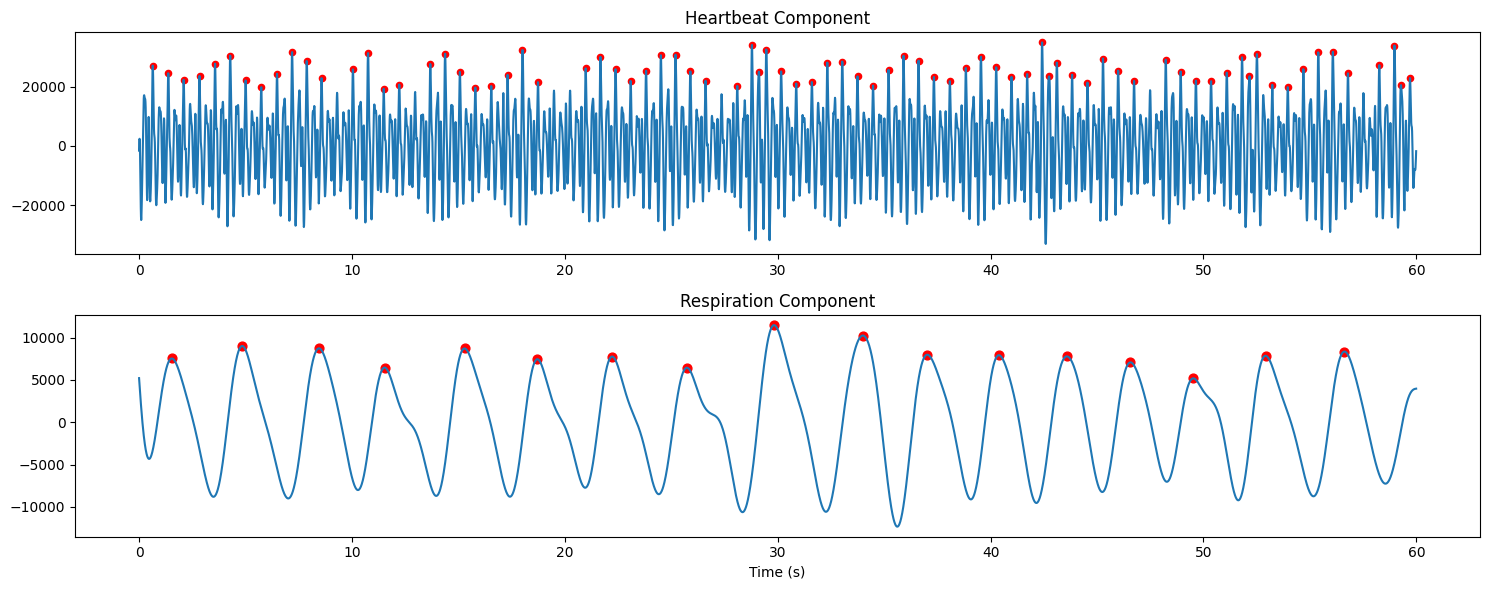

The mean value for the respiration duration is 3.442s, the Respiration Rate is 17.43.
The mean value for the heartbeat duration is 0.748s, the Heart Rate is 80.26.


In [34]:
from scipy.signal import find_peaks

hr_peaks = find_peaks(heart_beat, height = np.max(heart_beat)*0.55)[0]
rr_peaks = find_peaks(respiration, height = np.max(respiration)*0.3)[0]

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(t, heart_beat)
plt.scatter(t[hr_peaks], heart_beat[hr_peaks], color='red', s=20)
plt.title('Heartbeat Component')

plt.subplot(2,1,2)
plt.plot(t, respiration)
plt.scatter(t[rr_peaks], respiration[rr_peaks], color='red', s=40)
plt.title('Respiration Component')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


RR_gap = np.mean(t[rr_peaks[1:]] - t[rr_peaks[:-1]])
RR = 60/RR_gap
print(f'The mean value for the respiration duration is {RR_gap:.3f}s, the Respiration Rate is {RR:.2f}.')

HR_gap = np.mean(t[hr_peaks[1:]] - t[hr_peaks[:-1]])
HR = 60/HR_gap
print(f'The mean value for the heartbeat duration is {HR_gap:.3f}s, the Heart Rate is {HR:.2f}.')